<a href="https://colab.research.google.com/github/KoushaAm/MachineLearning/blob/main/CNN_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import zipfile
import os

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


#unzip our data


zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-28 06:06:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 22s     

2023-04-28 06:07:07 (22.2 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 

  # construct a directory address
  target_folder = target_dir + target_class
  
  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")


  

In [22]:
# Create the classes 

import pathlib 
import numpy as np 


FILENAME = "10_food_classes_all_data"

data_dir_multi = pathlib.Path(FILENAME + "/" + "test")

classes_multi = np.array(sorted([item.name for item in data_dir_multi.glob('*')]))

print(classes_multi), len(classes_multi)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


(None, 10)

In [23]:
# get the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


IMAGE_SIZE = (224, 224)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


train_data = train_datagen.flow_from_directory(directory= train_dir, 
                                               target_size = IMAGE_SIZE, 
                                               batch_size = 32, 
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory= test_dir, 
                                               target_size = IMAGE_SIZE, 
                                               batch_size = 32, 
                                               class_mode = 'categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [24]:
7500/32


234.375

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 

  # construct a directory address
  target_folder = target_dir + target_class
  
  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")


  

image shape: (384, 512, 3)


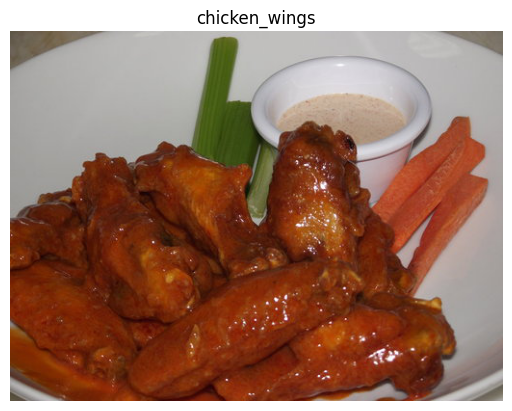

In [26]:
import random



train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

view_random_image(target_dir = train_dir, 
                        target_class= random.choice(classes_multi))

In [27]:
for dirpath, dirnames, filenames in os.walk(FILENAME): 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 10 directories and 0 images in 10_fo

image shape: (512, 512, 3)


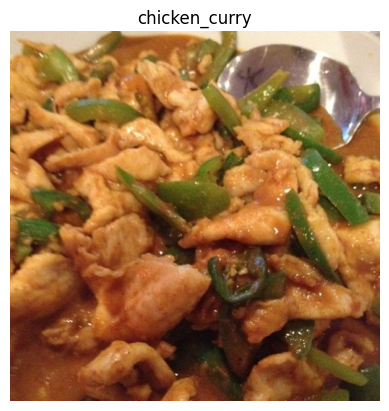

In [28]:
view_random_image(FILENAME + "/test/", classes_multi[0])

In [29]:
def load_to_tensor(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels = 3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  return img/255.0


In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load_to_tensor(filename = "101833.jpg", img_shape = 224).shape
 

In [31]:
def graph_history(history): 
  plt.plot(history.history['loss'], label = "loss")
  plt.plot(history.history['val_loss'], label = "val_loss")
  plt.legend()

  plt.figure()

  plt.plot(history.history['accuracy'], label = "accuracy")
  plt.plot(history.history['val_accuracy'], label = "val_accuracy")
  plt.legend()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [33]:
# ## NOTEEEE : the reason why this model performed poorly was the un-shuffled train data


# model_9 = Sequential([
    
#     Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
#     Conv2D(10, 3, activation='relu'),
#     MaxPool2D(),
#     Conv2D(10, 3, activation='relu'),
#     Conv2D(10, 3, activation='relu'),
#     MaxPool2D(),
#     Flatten(),
#     Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
#   ])

# model_9.compile(loss="categorical_crossentropy",
#                 optimizer = tf.keras.optimizers.Adam(), 
#                 metrics = ['accuracy'])


# history_9 = model_9.fit(train_data, 
#                         epochs = 5, 
#                         steps_per_epoch = len(train_data), 
#                         validation_data = test_data, 
#                         validation_steps = len(test_data))


In [34]:


# model_10 = Sequential([
#   Conv2D(10, 3, input_shape=(224, 224, 3)),
#   Activation(activation = 'relu'),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Conv2D(10, 3, activation='relu'),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Flatten(),
#   Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
# ])

# # Compile the model
# model_10.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
#                  optimizer=tf.keras.optimizers.Adam(),
#                  metrics=["accuracy"])
     

# history_10 = model_10.fit(train_data, 
#                           epochs = 5,
#                           steps_per_epoch = len(train_data), 
#                           validation_data = test_data,
#                           validation_steps = len(test_data))

In [35]:
# model_10.evaluate(test_data)

In [36]:
#graph_history(history_10)

NameError: ignored

the model is overfitting a LOT 

Trying Data Augmentation

In [37]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 20, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             zoom_range = 0.2, 
                                             horizontal_flip = True)


train_data_augmented  = train_datagen_augmented.flow_from_directory(directory = train_dir, 
                                                                 target_size = IMAGE_SIZE, 
                                                                 batch_size = 32, 
                                                                 class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [38]:
model_11 = Sequential([
  Conv2D(10, 3, activation = 'relu',  input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_11.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
     
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

history_11 = model_11.fit(train_data_augmented, 
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented), 
                          validation_data = test_data,
                          validation_steps = len(test_data), 
                          callbacks=lr_schedular)

Epoch 1/5
235/235 [==============================] - 138s 569ms/step - loss: 2.2595 - accuracy: 0.1456 - val_loss: 2.1792 - val_accuracy: 0.1600 - lr: 0.0010
Epoch 2/5
235/235 [==============================] - 125s 533ms/step - loss: 2.1863 - accuracy: 0.1844 - val_loss: 2.1019 - val_accuracy: 0.2272 - lr: 0.0011
Epoch 3/5
235/235 [==============================] - 125s 533ms/step - loss: 2.1247 - accuracy: 0.2315 - val_loss: 2.0133 - val_accuracy: 0.2872 - lr: 0.0013
Epoch 4/5
235/235 [==============================] - 126s 538ms/step - loss: 2.0706 - accuracy: 0.2564 - val_loss: 1.9310 - val_accuracy: 0.3244 - lr: 0.0014
Epoch 5/5
235/235 [==============================] - 125s 532ms/step - loss: 2.0391 - accuracy: 0.2815 - val_loss: 1.8705 - val_accuracy: 0.3544 - lr: 0.0016


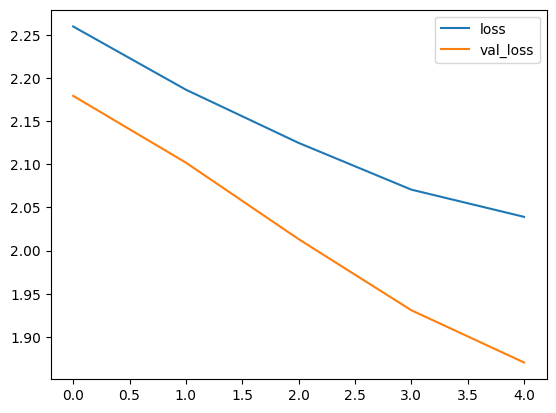

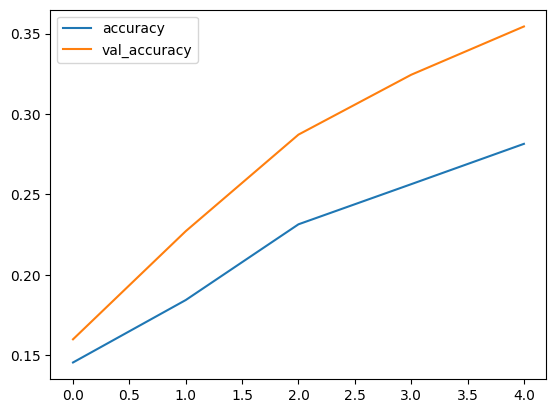

In [39]:
graph_history(history_11)

at least no overfitting: to improve the accruacy, add more layers

In [40]:
model_11.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.8705 - accuracy: 0.3544


[1.8705085515975952, 0.35440000891685486]

**make a prediction function**

In [41]:


import os 


def load_to_tesor(filename, img_shape = 224): 

  raw = tf.io.read_file(filename)
  img = tf.io.decode_image(raw, channels = 3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  print(img.shape)

  return img/255.


In [42]:
classes_multi

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [46]:
img_converted = load_to_tesor("sushi.png", img_shape = 224)

img_converted = tf.expand_dims(img_converted, axis = 0)

model_11.predict(img_converted)

(224, 224, 3)
1/1 [==============================] - 1s 728ms/step


array([[0.09691054, 0.11918586, 0.0512304 , 0.15615708, 0.10525957,
        0.04386226, 0.10110233, 0.06411497, 0.08745193, 0.17472506]],
      dtype=float32)

In [47]:
def get_pred_label(pred): 
  pred = pred.argmax()
  return classes_multi[pred]

In [48]:
get_pred_label(model_11.predict(img_converted))

1/1 [==============================] - 0s 28ms/step


'sushi'

In [49]:
def graph_pred(filename, model): 

  img_converted = load_to_tesor(filename, img_shape = 224)
  img_converted_added_dim = tf.expand_dims(img_converted, axis = 0)
  label = get_pred_label(model_11.predict(img_converted_added_dim))

  plt.imshow(img_converted)
  plt.title(f"Prediction: {label}")
  plt.axis(False);

  


(224, 224, 3)
1/1 [==============================] - 0s 20ms/step


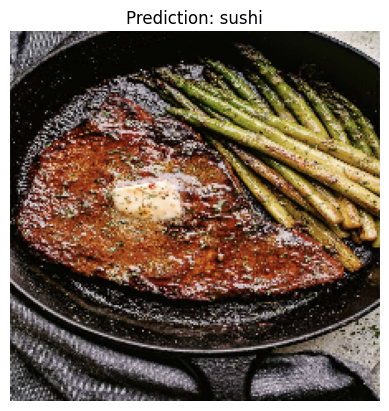

In [51]:
graph_pred("sushi.png", model_11)